<a href="https://colab.research.google.com/github/julianamo93/Data-Science-Estudos/blob/main/IntroDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a Data Science - Alura**

*   Primeiros passos com o Jupyter Notebook (no meu caso, já vistos na FIAP).
*   Análise exploratória de dados

# Analisando as Notas em Geral

In [96]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Encontrando quantas linhas e colunas tem nesses dados.

In [97]:
notas.shape

(100836, 4)

In [98]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
notas['nota'].unique() # devolve os valores unicos dessa serie

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

O PANDAS serve para ler conjuntos de dados de diversas maneiras, diversos tipos de leitura e tipos de dados. Ele também serve para extrair a contagem de dados, por exedmplo, nas colunas.



In [100]:
notas['nota'].value_counts() # contando e ordenando os valores, do maior para o menor
# nessa contagem temos a nota e quantas vezes essa nota foi atribuída

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [101]:
# Calculando a média da coluna 'nota'
media_nota = notas['nota'].mean()
print("Média: ", media_nota)

# Calculando a mediana da coluna 'nota'
mediana_nota = notas['nota'].median()
print("Mediana: ", mediana_nota)

Média:  3.501556983616962
Mediana:  3.5


## **Visualizando Dados com Histograma e Boxplot**

*   Explorando os dados de nota de maneira visual.

In [102]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

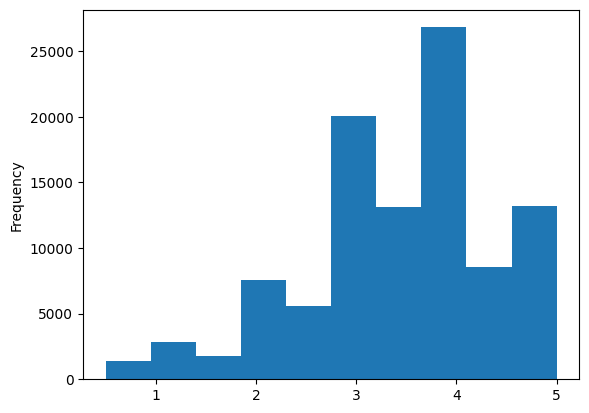

In [103]:
notas.nota.plot(kind='hist') # plotando uma serie

In [104]:
notas.nota.describe() # para expor diversas medidas de descrição dos dados

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

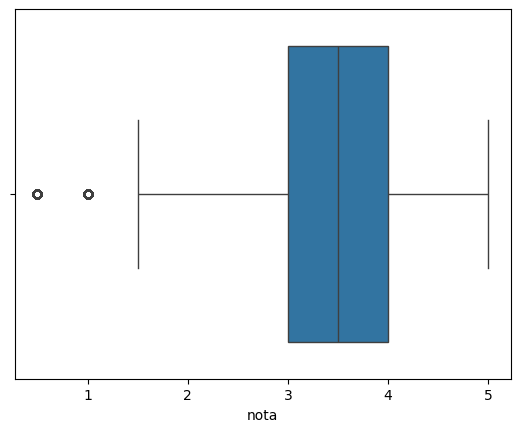

In [105]:
import seaborn as sns

sns.boxplot(x=notas.nota) # vai mostrar os dados anteriores visualmente e mais acessivel
# podemos mostrar o eixo y e mostrar o gráfico deitado também

## **Análise Exploratória de Dados e mais Gráficos**

*   Carregando mais um bloco de dados, o Movies.csv


# Visualizando os filmes

In [106]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId", "titulo", "generos"] # renomeando as colunas para PT-BR
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando algumas notas específicas por filme

In [107]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [108]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [109]:
notas.groupby("filmeId").mean() # o groupby serve para agrupar/agregar valores,
# e executamos uma função que calcula algo em cima do grupo de valores
# filtrar colunas

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [110]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"] # extraindo apenas um valor da coluna
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

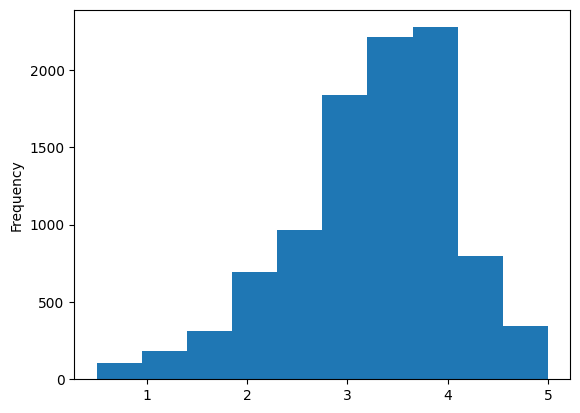

In [111]:
medias_por_filme.plot(kind='hist')

<Axes: xlabel='nota'>

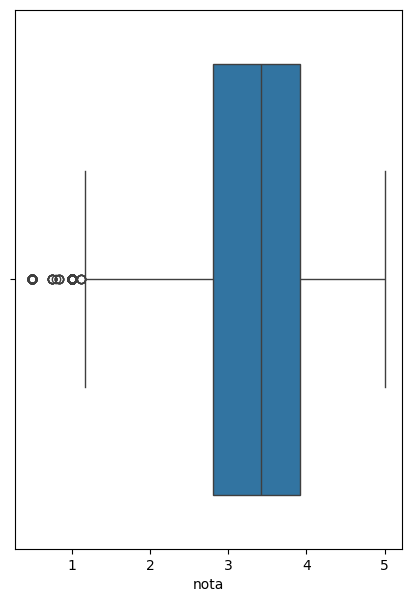

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,7)) # podemos usar o pyplot para configurar gráficos, no caso, o tamanho do g´rafico
sns.boxplot(x=medias_por_filme) # podemos usar o eixo y e mostrar o gráfico deitado

In [113]:
medias_por_filme.describe() # muito cuidado ao fazer medias de media

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

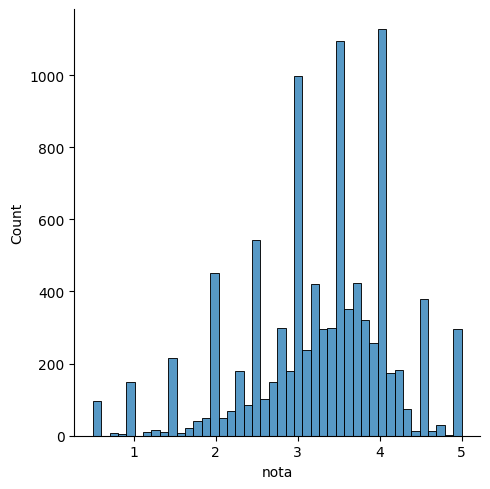

In [114]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das Médias dos Filmes')

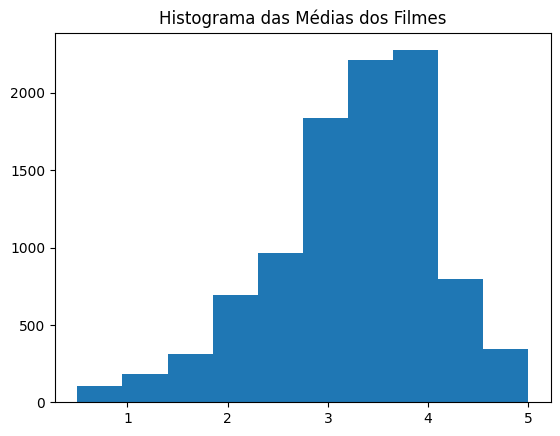

In [115]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das Médias dos Filmes")

# **Tipos de Variáveis**



In [123]:
import pandas as pd

pd.read_csv("tmdb_5000_movies.csv")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [124]:
tmdb.vote_average.unique() # para deixarmos as notas como únicas, utilizamos esta função, tendo como retorno uma variável de escala intervalar

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [125]:
tmdb.original_language.unique() # categoria nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [126]:
tmdb["original_language"].value_counts().index # contando quantas vezes aparece cada lingua

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [127]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


# **Categorical Plots**

<Axes: xlabel='original_language', ylabel='total'>

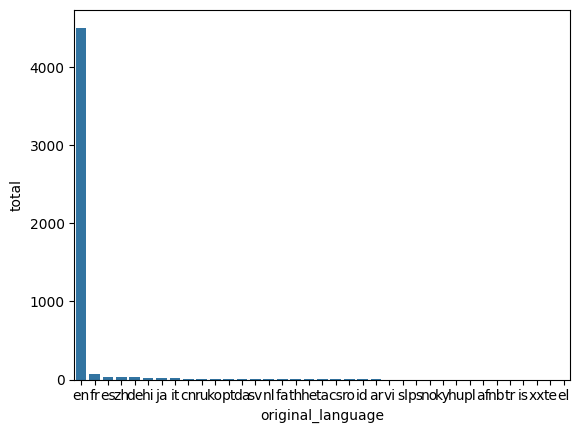

In [128]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

Criando o gráfico de forma mais simples e objetiva, com o mesmo resultado do outro, de uma forma melhor.


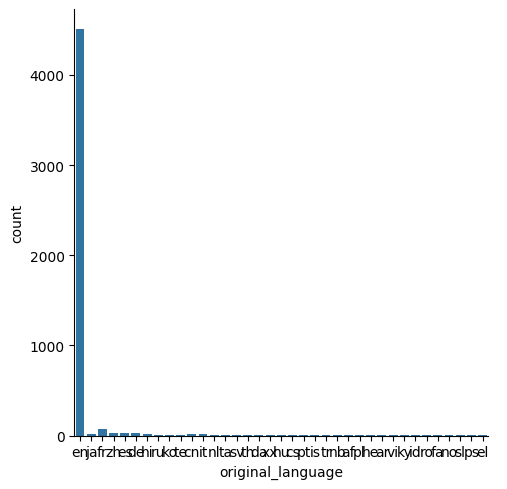

In [129]:
sns.catplot(x = "original_language", kind="count", data = tmdb) # usando de uma forma mais fácil

([<matplotlib.patches.Wedge at 0x78e17c79f040>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

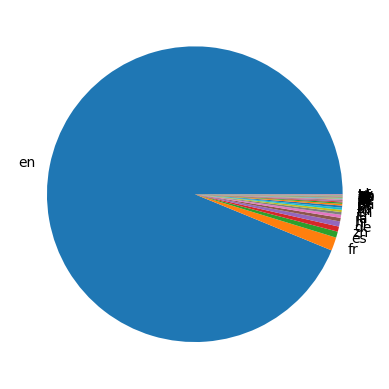

In [130]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

Focar o gráfico para passar uma mensagem clara, de forma objetiva e compreensível.



In [131]:
total_lingua = tmdb["original_language"].value_counts() # contagem de linguas
total_geral = total_lingua.sum() # contagem geral
total_en = total_lingua.loc["en"] # contagem apenas de inglês
total_restante = total_geral - total_en # o resto das linguas menos o inglês para saber os valores restantes
print(total_en, total_restante) # print dos totais

4505 298


<Axes: xlabel='lingua', ylabel='total'>

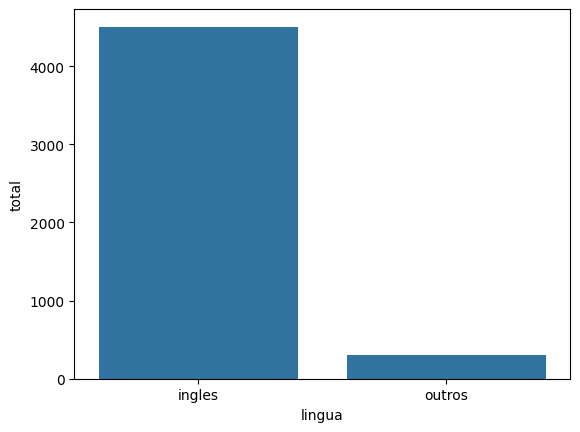

In [132]:
dados = {
    'lingua': ['ingles','outros'],
    'total': [total_en, total_restante]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x78e17c4f95a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

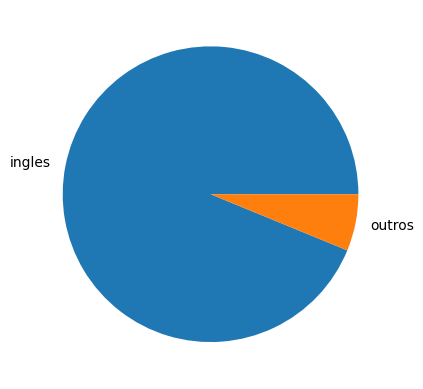

In [133]:
plt.pie(dados["total"], labels = dados["lingua"])

In [134]:
total_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()
total_lingua_outros

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

# **Refinando Visualizações de Dados**

*   Nesta etapa, estamos definindo melhores visualizações dos gráficos criados, utilizando seaborn, matplotlib, palettes diferentes, ordenando o tamanho correto com aspect e ordenando os dados de acordo com a história que estamos contando nas visualizações, tudo isso encontrado na documentação.


- como não aceita figsize (leia a doc), então usamos o aspect
o order faz ordenar as linguas por aparições

<ipython-input-135-cc82e4f8930f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "original_language", kind="count",


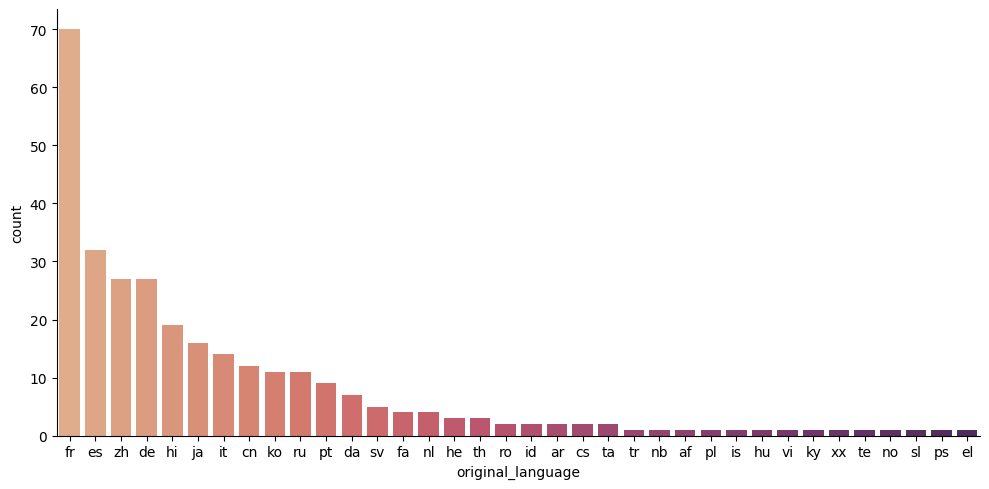

In [135]:
filmes_semlingua_original_ingles = tmdb.query("original_language != 'en'")


sns.catplot(x = "original_language", kind="count",
            data = filmes_semlingua_original_ingles,
            aspect = 2,
            palette="flare",
            order = total_lingua_outros.index)

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

*   Revisando o papel de tudo isso em uma análise de dados.


In [137]:
filmes.head(2)

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [141]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [144]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [164]:
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114047 0.8817134921476455


In [165]:
print("Nota mediana do Toy Story %.2f" % notas_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [149]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))


In [163]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

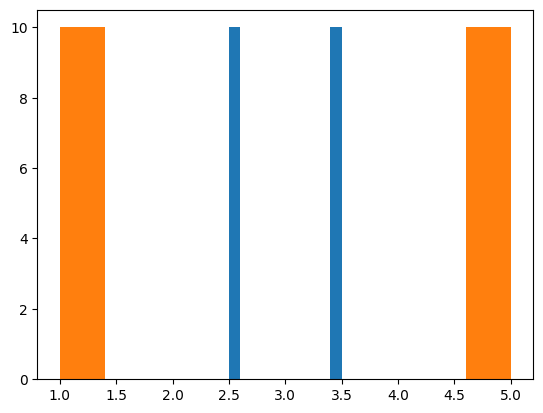

In [153]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x78e1779d5a80>,
 'caps': [<matplotlib.lines.Line2D at 0x78e1779d5e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e177ab7e80>,
 'medians': [<matplotlib.lines.Line2D at 0x78e1779d4610>,
 'fliers': [<matplotlib.lines.Line2D at 0x78e1779d57e0>,
 'means': []}

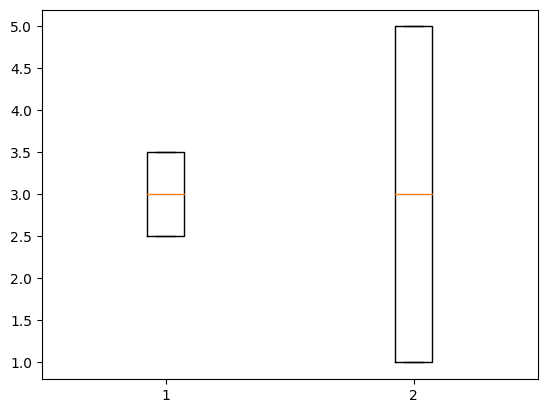

In [155]:
plt.boxplot((filme1, filme2))

{'whiskers': [<matplotlib.lines.Line2D at 0x78e177802800>,
 'caps': [<matplotlib.lines.Line2D at 0x78e177802d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e177802560>,
 'medians': [<matplotlib.lines.Line2D at 0x78e177803280>,
 'fliers': [<matplotlib.lines.Line2D at 0x78e177803520>,
 'means': []}

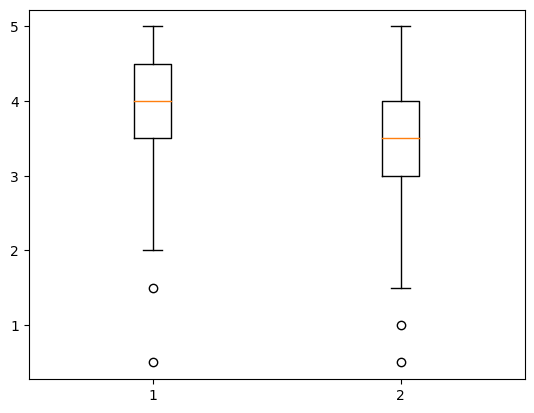

In [160]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

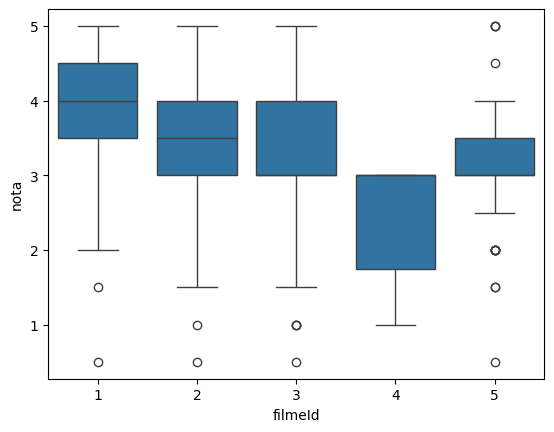

In [162]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))